In [2]:
import cv2
import os 
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

(91, 90)


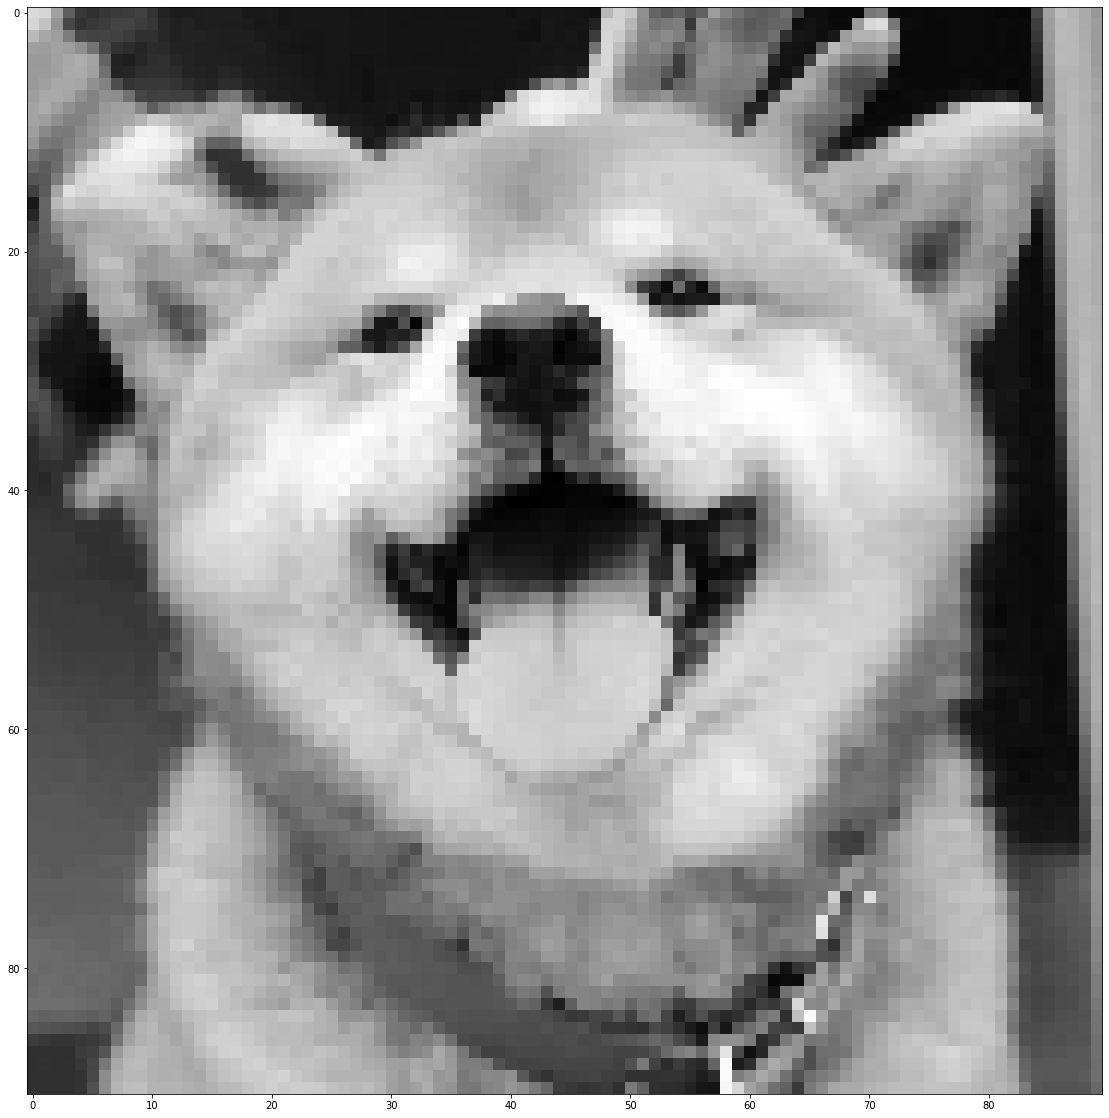

In [3]:
img = cv2.imread('./shiba2.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# fx, fy가 작을 수록 픽셀이 더 크게 나뉨
imgray = cv2.resize(imgray,None,fx=0.15,fy=0.15)
print(imgray.shape)
plt.figure(figsize=(20,20))
plt.imshow(imgray,'gray')

# MNIST로 이미지 모자이크하기

In [4]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [5]:
(x_train, y_train), (x_test, y_test) = load_data()

(<matplotlib.axes._subplots.AxesSubplot at 0x10f26d710>,
 <matplotlib.image.AxesImage at 0x13f30f6d8>)

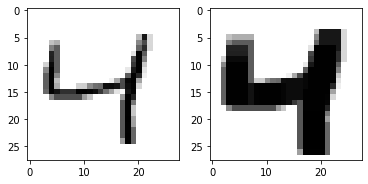

In [6]:
# ~로 이미지 반전
orig_img = ~x_train[2]
kernel = np.ones((4,4),np.uint8)
char_img = cv2.erode(orig_img,kernel,iterations=1)
plt.subplot(121),plt.imshow(orig_img,'gray')
plt.subplot(122),plt.imshow(char_img,'gray')

## 손글씨라서 따로 굵기를 늘리진 않음

84


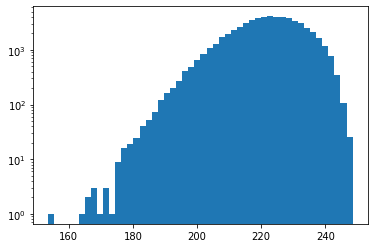

In [23]:
means = np.mean(255- x_train,axis=(1,2))
plt.hist(means,bins=50,log=True)

character_bins = defaultdict(list)
for char, mean in zip(x_train,means):
    character_bins[int(mean)].append(char)
print(len(character_bins))    

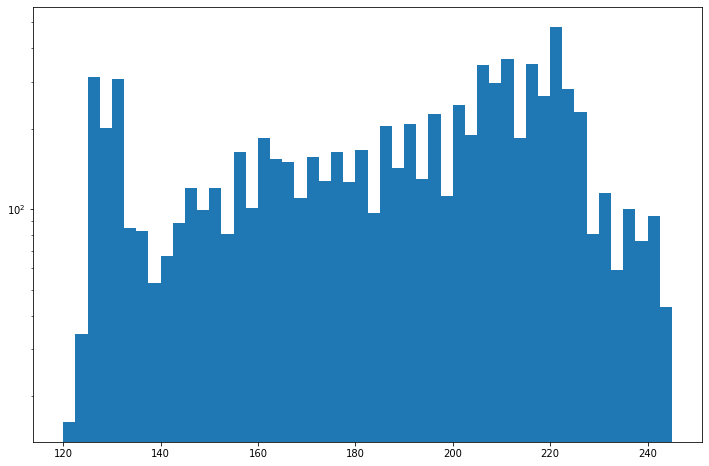

In [35]:
img = cv2.normalize(imgray,None,120,245,cv2.NORM_MINMAX)

plt.figure(figsize=(12,8))
plt.hist(img.flatten(),bins=50,log=True)
plt.show()

# 이미지 채우기

True

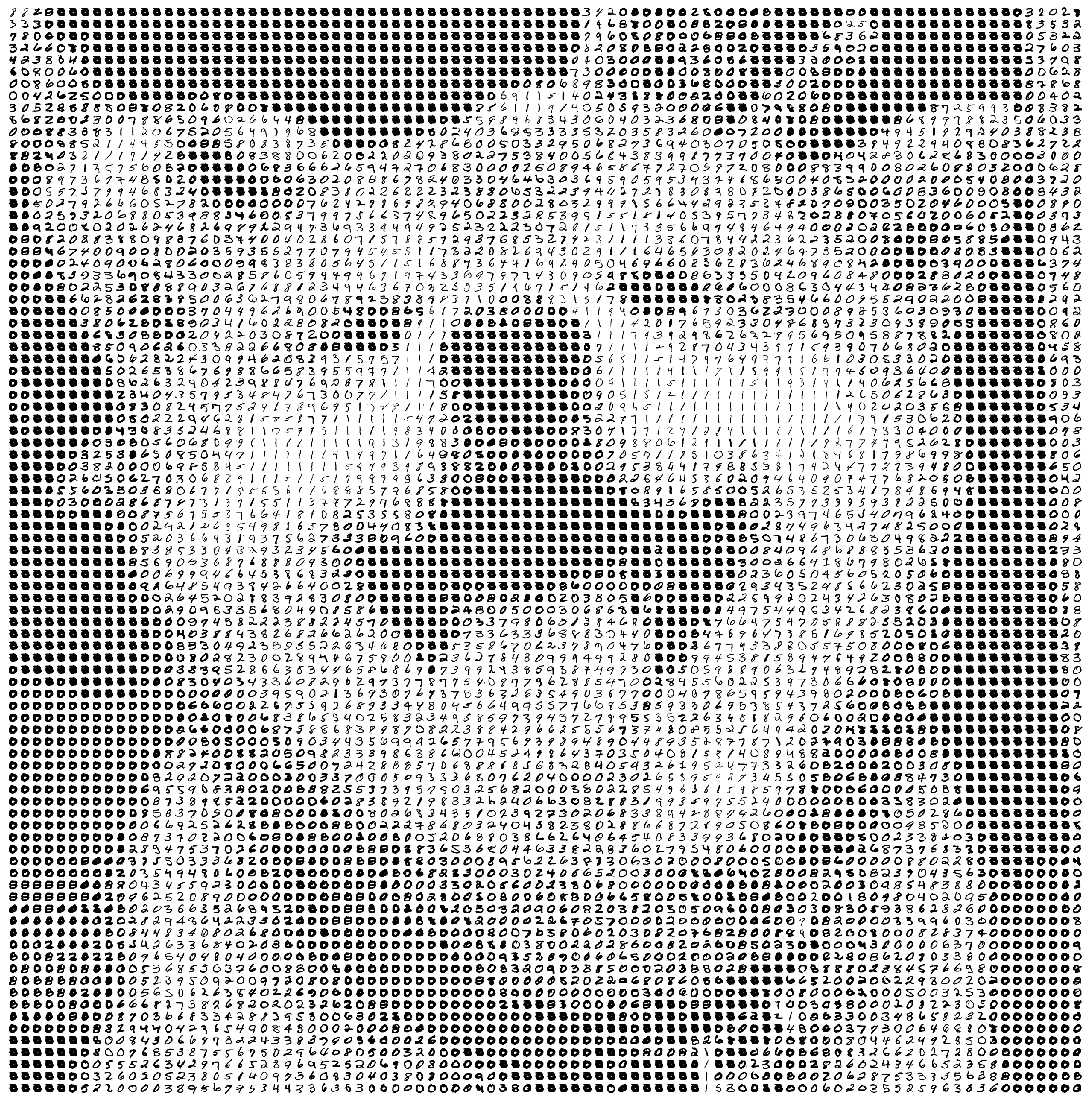

In [36]:
h, w = img.shape

img_output = np.zeros((h*28,w*28), dtype=np.uint8)

for y in range(h):
    for x in range(w):
        level = img[y,x]
        
        b = character_bins[level]
        
        while len(b) == 0:
            level += 1
            b = character_bins[level]
            
        image_patch = 255 - b[np.random.randint(len(b))]
        
        img_output[y*28:(y+1)*28,x*28:(x+1)*28] = image_patch

plt.figure(figsize=(20,20))        
plt.axis('off')
plt.imshow(img_output,'gray')
# cv2.imwrite('shiba_output2.jpg',img_output)